# ME314 Homework 3

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing 
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change" 
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

Name: Christopher Luey

Collaborators: 

https://colab.research.google.com/drive/1IR8_aUSDjX-fGu8lXWA-O47PjsiQiKGb#scrollTo=lCwyLmnjiyxa

In [ ]:
#IMPORT CELL
import sympy as sym
import numpy as np
from IPython.display import display, Math, Latex


In [ ]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice 
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Below are the help functions in previous homeworks, which you may need for this homework.

In [ ]:

def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.
    
    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    
    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj 

def animate_double_pend(theta_array,L1=1,L2=1,T=10):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation

    ####################################
    # Using these to specify axis limits.
    xm=np.min(xx1)-0.5
    xM=np.max(xx1)+0.5
    ym=np.min(yy1)-2.5
    yM=np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xx1, y=yy1, 
               mode='lines', name='Arm', 
               line=dict(width=2, color='blue')
              ),
          dict(x=xx1, y=yy1, 
               mode='lines', name='Mass 1',
               line=dict(width=2, color='purple')
              ),
          dict(x=xx2, y=yy2, 
               mode='lines', name='Mass 2',
               line=dict(width=2, color='green')
              ),
          dict(x=xx1, y=yy1, 
               mode='markers', name='Pendulum 1 Traj', 
               marker=dict(color="purple", size=2)
              ),
          dict(x=xx2, y=yy2, 
               mode='markers', name='Pendulum 2 Traj', 
               marker=dict(color="green", size=2)
              ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[dict(x=[0,xx1[k],xx2[k]], 
                            y=[0,yy1[k],yy2[k]], 
                            mode='lines',
                            line=dict(color='red', width=3)
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       go.Scatter(
                            x=[xx2[k]],
                            y=[yy2[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

## Problem 1 (10pts)

Let $f:\mathbb{R}^2\to\mathbb{R}$ with $f(x,y)=\sin(x+y)\sin(x-y)$.  Show that $(x,y)=(0,\pi/2)$ satisfies both the necessary and sufficient conditions to be a local minimizer of $f$.

> *Hint 1: You will need to take the first and second order derivative of $f$ with respect to $[x,y]$.*

---
**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use $\LaTeX$. If you use SymPy, include a copy of your code and all the outputs. Regardless of the format you choose, explain why your result satisfies the necessary and sufficient conditions.**

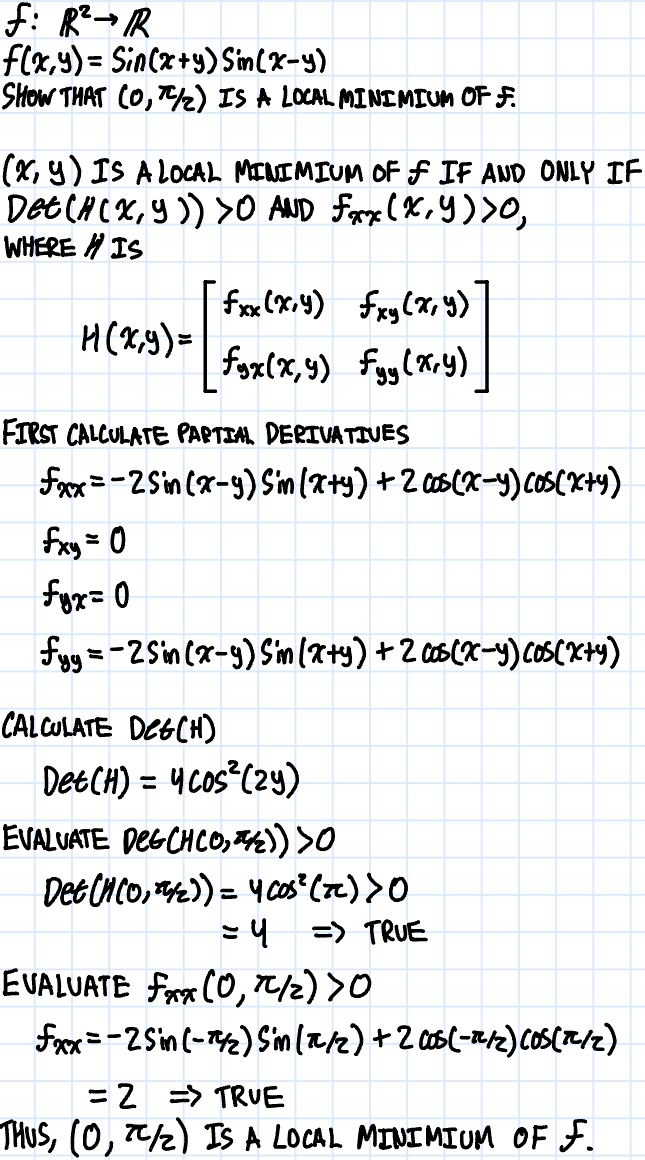

## Problem 2 (20pts)

In [ ]:
#@title
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/twolinearmasses.png' width=500' height='350'></table>"))

Compute the equations of motion for the two-mass-spring system (shown above) in $\theta=(\theta_1,\theta_2)$ coordinates. The first sphere with mass $m_1$ is the one close to the wall, and the second sphere has mass $m_2$. Assume that there is a spring of spring constant $k_1$ between the first mass and the wall and a spring of spring constant $k_2$ between the first mass and the second mass.

---
**Turn in: Include the code used to symbolically solve for the equations of motion and the code output, which should be the equations of motion. Make sure you are using *SimPy*'s `.simplify()` functionality when printing your output.**

In [ ]:
l, m1, m2, k1, k2, t = sym.symbols(r"l, m1, m2, k1, k2, t")
t1, t2, y1, y2 = sym.Function("theta1")(t), sym.Function("theta2")(t), sym.Function("y1")(t), sym.Function("y2")(t)
y1, y2 = sym.tan(t1) * l, sym.tan(t1 + t2) * l

L = sym.Matrix([(1/2) * m1 * y1.diff(t) ** 2 + (1/2) * m2 * y2.diff(t) ** 2 - (1/2) * m1 * y1** 2 + (1/2) * m2 * (y2 - y1) ** 2])

q = sym.Matrix([t1, t2])
ELEQ = sym.Eq(L.jacobian(q), L.jacobian(q.diff(t)).diff(t))
sol = sym.solve(ELEQ, q.diff(t).diff(t))

display(sym.Eq(t1.diff(t).diff(t), sym.simplify(sol[t1.diff(t).diff(t)])))
display(sym.Eq(t2.diff(t).diff(t), sym.simplify(sol[t2.diff(t).diff(t)])))

             ⎛                                2                               
             ⎜            3        ⎛d        ⎞                      ⎛d        
  2          ⎜- 2.0⋅m₁⋅tan (θ₁(t))⋅⎜──(θ₁(t))⎟  - 2.0⋅m₁⋅tan(θ₁(t))⋅⎜──(θ₁(t))
 d           ⎝                     ⎝dt       ⎠                      ⎝dt       
───(θ₁(t)) = ─────────────────────────────────────────────────────────────────
  2                                                                           
dt                                                                            

 2                                                        ⎞            
⎞                                                         ⎟    2       
⎟  - m₁⋅tan(θ₁(t)) - m₂⋅tan(θ₁(t) + θ₂(t)) + m₂⋅tan(θ₁(t))⎟⋅cos (θ₁(t))
⎠                                                         ⎠            
───────────────────────────────────────────────────────────────────────
  m₁                                                                   
              

                                          ⎛                                   
                                        2 ⎜            3                   2  
  2          (tan(θ₁(t))⋅tan(θ₂(t)) - 1) ⋅⎜- 2.0⋅m₁⋅tan (θ₁(t) + θ₂(t))⋅tan (θ
 d                                        ⎝                                   
───(θ₂(t)) = ─────────────────────────────────────────────────────────────────
  2                                                                           
dt                                                                            

                 2                                                            
      ⎛d        ⎞              3                   2        d         d       
₁(t))⋅⎜──(θ₁(t))⎟  - 4.0⋅m₁⋅tan (θ₁(t) + θ₂(t))⋅tan (θ₁(t))⋅──(θ₁(t))⋅──(θ₂(t)
      ⎝dt       ⎠                                           dt        dt      
──────────────────────────────────────────────────────────────────────────────
                                                   

## Problem 3 (10pts)

For the same two-spring-mass system in Problem 2, show by example that Newton's equations do not hold in an arbitrary choice of coordinates (but they do, of course, hold in Cartesian coordinates). Your example should be implemented using Python's SymPy package.

> *Hint 1: In other words, you need to find a set of coordinates $q=[q_1,q_2]$, and compute the equations of motion ($F=ma=m\ddot{q}$), showing that these equations of motion do not make the same prediction as Newton's laws in the Cartesian inertially fixed frame (where they are correct).*
>
> *Hint 2: Newton's equations don't hold in non-inertia coordinates. For the $x_1,x_2$ and $y_1,y_2$ coordinates shown in the image, one of them is non-inertia coordinate.*

---
**Turn in: Include the code you used to symbolically compute the equations of motion to show that Newton's equations don't hold. Also, include the output of the code, which should be the equations of motion under the chosen set of coordinates. Make sure toindicate what coordinate you choose in the comments.**

In [ ]:
# q = [x1, x2]
x1 = sym.Function("x1")(t)
x2 = sym.Function("x2")(t)

print("Express Newton's Laws in q = [y1, y2] inertial reference frame:")
y1eq = sym.Eq(y1.diff(t).diff(t), (-k1 * y1 + k2 * (y2 - y1))/ m1)
y2eq = sym.Eq(y2.diff(t).diff(t), -k2 * (y2 - y1) / m2)
display(y1eq)
display(y2eq)
print()

# Newton's Law for non-inertia reference frame
print("Express Newton's Laws in q = [x1, x2] non-inertial reference frame:")
x1eq = sym.Eq(x1.diff(t).diff(t) , (-k1 * x1 + k2 * x2)/ m1)
x2eq = sym.Eq(x2.diff(t).diff(t) , -k2 * x2 / m2)
display(x1eq)
display(x2eq)
print()

y1 = sym.Function("y1")(t)
y2 = sym.Function("y2")(t)
x1 = y1
x2 = y2 - y1

print("Perform coordinate transformation by subsituting x1 = y1 and x2 = y2 - y1")
_x1eq = sym.Eq(x1.diff(t).diff(t) , (-k1 * x1 + k2 * x2)/m1)
_x2eq = sym.Eq(x2.diff(t).diff(t) , -k2 * x2 / m2)
display(_x1eq)
display(_x2eq)
print()

print("Show by example by evaluating at m1 = 1, m2 = 4, k1 = 1, k2 = 2, y1 = 2, y2 = 4")
l_x1eq = sym.lambdify((m1, m2, k1, k2, y1, y2), (-k1 * x1 + k2 * x2)/m1)
l_x2eq = sym.lambdify((m1, m2, k1, k2, y1, y2), -k2 * x2 / m2)
l_y1eq = sym.lambdify((m1, m2, k1, k2, y1, y2), (-k1 * y1 + k2 * (y2 - y1))/ m1)
l_y2eq = sym.lambdify((m1, m2, k1, k2, y1, y2), -k2 * (y2 - y1) / m2 + l_y1eq(m1, m2, k1, k2, y1, y2))
x1 = sym.Function("x1")(t)
x2 = sym.Function("x2")(t)
display(sym.Eq(x1.diff(t).diff(t), l_x1eq(1, 4, 1, 2, 2, 4)))
display(sym.Eq(x2.diff(t).diff(t), l_x2eq(1, 4, 1, 2, 2, 4)))
display(sym.Eq(y1.diff(t).diff(t), l_y1eq(1, 4, 1, 2, 2, 4)))
display(sym.Eq(y2.diff(t).diff(t), l_y2eq(1, 4, 1, 2, 2, 4)))

print("There is a difference in prediction for different reference frames, one inertial (q = [y1, y2]) and one non-intertial (q = [x1, x2])")

Express Newton's Laws in q = [y1, y2] inertial reference frame:


                                            2                         2       
    ⎛   2           ⎞            ⎛d        ⎞      ⎛   2           ⎞  d        
2⋅l⋅⎝tan (θ₁(t)) + 1⎠⋅tan(θ₁(t))⋅⎜──(θ₁(t))⎟  + l⋅⎝tan (θ₁(t)) + 1⎠⋅───(θ₁(t))
                                 ⎝dt       ⎠                          2       
                                                                    dt        

                                                              
   -k₁⋅l⋅tan(θ₁(t)) + k₂⋅(l⋅tan(θ₁(t) + θ₂(t)) - l⋅tan(θ₁(t)))
 = ───────────────────────────────────────────────────────────
                                m₁                            
                                                              

                                                     2                        
    ⎛   2                   ⎞ ⎛d           d        ⎞                         
2⋅l⋅⎝tan (θ₁(t) + θ₂(t)) + 1⎠⋅⎜──(θ₁(t)) + ──(θ₂(t))⎟ ⋅tan(θ₁(t) + θ₂(t)) + l⋅
                              ⎝dt          dt       ⎠                         
                                                                              

                          ⎛  2            2       ⎞                           
⎛   2                   ⎞ ⎜ d            d        ⎟   -k₂⋅(l⋅tan(θ₁(t) + θ₂(t)
⎝tan (θ₁(t) + θ₂(t)) + 1⎠⋅⎜───(θ₁(t)) + ───(θ₂(t))⎟ = ────────────────────────
                          ⎜  2            2       ⎟                       m₂  
                          ⎝dt           dt        ⎠                           

                  
) - l⋅tan(θ₁(t))) 
──────────────────
                  
                  


Express Newton's Laws in q = [x1, x2] non-inertial reference frame:


  2                              
 d           -k₁⋅x₁(t) + k₂⋅x₂(t)
───(x₁(t)) = ────────────────────
  2                   m₁         
dt                               

  2                    
 d           -k₂⋅x₂(t) 
───(x₂(t)) = ──────────
  2              m₂    
dt                     


Perform coordinate transformation by subsituting x1 = y1 and x2 = y2 - y1


  2                                         
 d           -k₁⋅y₁(t) + k₂⋅(-y₁(t) + y₂(t))
───(y₁(t)) = ───────────────────────────────
  2                         m₁              
dt                                          

    2            2                               
   d            d           -k₂⋅(-y₁(t) + y₂(t)) 
- ───(y₁(t)) + ───(y₂(t)) = ─────────────────────
    2            2                    m₂         
  dt           dt                                


Show by example by evaluating at m1 = 1, m2 = 4, k1 = 1, k2 = 2, y1 = 2, y2 = 4


  2             
 d              
───(x₁(t)) = 2.0
  2             
dt              

  2              
 d               
───(x₂(t)) = -1.0
  2              
dt               

  2             
 d              
───(y₁(t)) = 2.0
  2             
dt              

  2             
 d              
───(y₂(t)) = 1.0
  2             
dt              

There is a difference in prediction for different reference frames, one inertial (q = [y1, y2]) and one non-intertial (q = [x1, x2])



## Problem 4 (10pts)

In [ ]:
#@title
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dyndoublepend.png' width=500' height='350'></table>"))



For the same double-pendulum system hanging in gravity in Homework 2 (shown above), take $q=[\theta_1, \theta_2]$ as the system configuration variables, with $R_1=R_2=1, m_1=m_2=1$. Symbolically compute the Hamiltonian of this system using Python's *SymPy* package.

---
**Turn in: Include the code used to symbolically compute the Hamiltonian of the system and the code output, which should the Hamiltonian of the system. Make sure you are using *SimPy*'s `.simplify()` functionality when printing your output.**

In [ ]:
t, r1, r2, m1, m2, g= sym.symbols("t, r1, r2, m1, m2, g")
x1, x2, y1, y2, t1, t2 = sym.Function("x1")(t), sym.Function("x2")(t), sym.Function("y1")(t), sym.Function("y2")(t), sym.Function("t1")(t), sym.Function("t2")(t)
x1, y1 = r1*sym.sin(t1), -r1 * sym.cos(t1) 
x2, y2 = r2 * sym.sin(t1 + t2) + x1, -r2 * sym.cos(t1 + t2) + y1
L = sym.Matrix([((1/2) * m1 * (x1.diff(t) ** 2 + y1.diff(t) ** 2) + (1/2) * m2 * (x2.diff(t) ** 2 + y2.diff(t) ** 2)) - (m1 * g * y1 + m2 * g * y2)])
q = sym.Matrix([t1, t2])
p = L.jacobian(q.diff(t))
H = sym.simplify((p * q.diff(t) - L)[0])
display(H)

                                                                              
                                                                              
-g⋅m₁⋅r₁⋅cos(t₁(t)) - g⋅m₂⋅r₁⋅cos(t₁(t)) - g⋅m₂⋅r₂⋅cos(t₁(t) + t₂(t)) + 0.5⋅m₁
                                                                              

                2                         2                                   
   2 ⎛d        ⎞             2 ⎛d        ⎞                            ⎛d      
⋅r₁ ⋅⎜──(t₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(t₁(t))⎟  + 1.0⋅m₂⋅r₁⋅r₂⋅cos(t₂(t))⋅⎜──(t₁(t
     ⎝dt       ⎠               ⎝dt       ⎠                            ⎝dt     

   2                                                                       2  
  ⎞                            d         d                    2 ⎛d        ⎞   
))⎟  + 1.0⋅m₂⋅r₁⋅r₂⋅cos(t₂(t))⋅──(t₁(t))⋅──(t₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(t₁(t))⎟  +
  ⎠                            dt        dt                     ⎝dt       ⎠   

                                                 

## Problem 5 (10pts)

Simulate the double-pendulum system in Problem 4 with initial condition $\theta_1=\theta_2=-\frac{\pi}{2}, \dot{\theta}_1=\dot{\theta}_2=0$ for $t\in[0,10]$ and $dt=0.01$. Numerically evaluate the Hamiltonian of this system from the simulated trajectory, and plot it.

> *Hint 1: The Hamiltonian can be numerically evaluated as a function of $\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2$, which means for each time step in the simulated trajectory, you can compute the Hamiltonian for this time step, and store it in a list or array for plotting later. This doesn't need to be done during the numerical simulation, after you have the simulated the trajectory you can access each time step within another loop.*

---
**Turn in: Include the code used to numerically evaluate and plot the Hamiltonian, as well as the code output, which should be the plot of Hamiltonian. Make sure you label the plot with axis labels, legend and a title.**

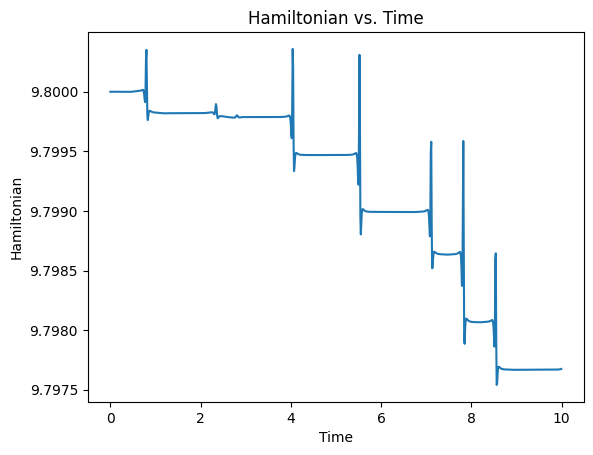

In [ ]:
L = sym.simplify(L)
ELEQ = sym.Eq(L.jacobian(q), L.jacobian(q.diff(t)).diff(t))
sol = sym.solve(ELEQ, q.diff(t).diff(t))

_t1 = sym.lambdify((r1, r2, m1, m2, t1, t2, t1.diff(t), t2.diff(t), g), sol[t1.diff(t).diff(t)])
_t2 = sym.lambdify((r1, r2, m1, m2, t1, t2, t1.diff(t), t2.diff(t), g), sol[t2.diff(t).diff(t)])
_H = sym.lambdify((r1, r2, m1, m2, t1, t2, t1.diff(t), t2.diff(t), g), H)
_H_ = []
def f(s):
  #[t1, t2, t1_dot, t2_dot]
  return np.array([s[2], s[3], _t1(1.0, 1.0, 1.0, 1.0, s[0], s[1], s[2], s[3], 9.8), _t2(1.0, 1.0, 1.0, 1.0, s[0], s[1], s[2], s[3], 9.8)])

result = simulate(f, np.array([-1*(np.pi)/2, -1*(np.pi)/2, 0.0,0.0]), [0, 10], 0.01, integrate)

import matplotlib.pyplot as plt
time = np.arange(0, 10, 0.01)
for i in range(0,1000):
    _H_.append(_H(1.0, 1.0, 1.0, 1.0, result[0][i], result[1][i], result[2][i], result[3][i], 9.8))

plt.plot(time, np.array(_H_).reshape(-1,))
plt.xlabel('Time')
plt.ylabel('Hamiltonian')
plt.title('Hamiltonian vs. Time')
plt.show()


## Problem 6 (15pts)

In the previously provided code for simulation, the numerical integration is a forth-order Runge–Kutta integration. Now, write down your own numerical integration function using Euler's method, and use your numerical integration function to simulate the same double-pendulum system with same parameters and initial condition in Problem 4. Compute and plot the Hamiltonian from the simulated trajectory, what's the difference between two plots?

> *Hint 1: You will need to implement a new ${\tt integrate()}$ function. This function takes in three inputs: a function $f(x)$ representing the dynamics of the system state $x$ (you can consider it as $\dot{x}=f(x)$), current state $x$ (for example $x(t)$ if $t$ is the current time step), and integration step length $dt$. This function should output $x(t+dt)$, for which the analytical solution is $x(t+dt) = x(t) + \int_t^{t+dt} f(x(\tau)) d\tau$. Thus, you need to think about how to numerically evaluate this integration using Euler's method.*
>
> *Hint 2: The implemented function should have the same input-output structure as the previous one.*
>
> *Hint 3: After you implement the new integration function, you can use the same helper function ${\tt simulate()}$ for simulation. You just need to input replace the integration function name as the new one (for example, your new function can be named as ${\tt euler\_integrate()}$). Please carefully read the comments in the ${\tt simulate()}$ function. Below is the template/example of how to implement the new integration function and use it for simulation.*

---
**Turn in: Include you numerical integration function (you only need to include the code for your new integration function), and the resulting plot of Hamiltonian. Make sure you label the plot appropriately with axis labels, legend and a title.**

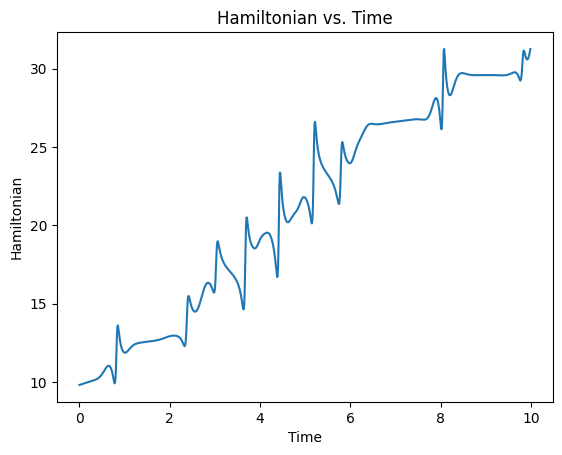

In [ ]:
def euler_integrate(f, xt, dt):
    return xt + dt * f(xt)


result = simulate(f, np.array([-1*(np.pi)/2, -1*(np.pi)/2, 0.0,0.0]), [0, 10], 0.01, euler_integrate)
time = np.arange(0, 10, 0.01)
_H_ = []
for i in range(0,1000):
    _H_.append(_H(1.0, 1.0, 1.0, 1.0, result[0][i], result[1][i], result[2][i], result[3][i], 9.8))

plt.plot(time, np.array(_H_).reshape(-1,))
plt.xlabel('Time')
plt.ylabel('Hamiltonian')
plt.title('Hamiltonian vs. Time')
plt.show()

## Problem 7 (20pts)

For the same double-pendulum you simulated in Problem 4 with same parameters and initial condition, now add a constraint to the system such that the distance between the second pendulum and the origin is fixed at $\sqrt{2}$. Simulate the system with same parameters and initial condition, and animate the system with the same animate function provided in Homework 2.

> *Hint 1: What do you think the equations of motion should look like? Think about how the system will behave after adding the constraint. With no double, you can solve this problem using $\phi$ and all the following results for constrained Euler-Lagrange equations, however, if you really understand this constrained system, things might be much easier, and you can actually treat it as an unconstrained system.*

---
**Turn in: Include the code used to numerically evaluate, simulate and animate the system. Also, upload the video of animation separately through Canvas in ".mp4" format. You can use screen capture or record the screen directly with your phone.**

In [ ]:
phi = sym.Function("phi")(t)
phi = x2 ** 2 + y2 ** 2 - 2
e = sym.symbols(r"lambda")
d2dt2q = sym.Matrix([t1.diff(t).diff(t), t2.diff(t).diff(t), e])
ELEQ = sym.Eq(L.jacobian(q) - L.jacobian(q.diff(t)).diff(t), e*sym.Matrix([phi]).jacobian(q))
sol = sym.solve([sym.simplify(ELEQ), sym.Eq(phi.diff(t).diff(t), 0)], d2dt2q, dict=False)

_t1 = sym.lambdify((r1, r2, m1, m2, t1, t2, t1.diff(t), t2.diff(t), g), sol[t1.diff(t).diff(t)])
_t2 = sym.lambdify((r1, r2, m1, m2, t1, t2, t1.diff(t), t2.diff(t), g), sol[t2.diff(t).diff(t)])
_e = sym.lambdify((r1, r2, m1, m2, t1, t2, t1.diff(t), t2.diff(t), g), sol[e])

def f(s):
  #[t1, t2, t1_dot, t2_dot]
  return np.array([s[2], s[3], _t1(1.0, 1.0, 1.0, 1.0, s[0], s[1], s[2], s[3], 9.8), _t2(1.0, 1.0, 1.0, 1.0, s[0], s[1], s[2], s[3], 9.8)])

result = simulate(f, np.array([-1*(np.pi)/2, -1*(np.pi)/2, 0.0,0.0]), [0, 10], 0.01, integrate)

animate_double_pend(result,T=10)

Output hidden; open in https://colab.research.google.com to view.

## Problem 8 (5pts)

For the same system with same constraint in Problem 6, simulate the system with initial condition $\theta_1=\theta_2=-\frac{\pi}{4}$, which actually violates the constraint! Simulate the system and see what happen, what do you think is the actual influence after adding this constraint?

---
**Turn in: Your thoughts about the actual effect of the constraint in this system. Note that you don't need to include any code for this problem.**

In [ ]:
result = simulate(f, np.array([-1*(np.pi)/4, -1*(np.pi)/4, 0.0,0.0]), [0, 10], 0.01, integrate)

animate_double_pend(result,T=10)



Output hidden; open in https://colab.research.google.com to view.

**The constraint doesn't force the system to obey, rather it is a global minimium for the system to settle in which is the lowest energy state for the system to follow. This is what the langrange multipliers do in multivariate calculus and similarly have the same effect here.**


